In [1]:
from pyslise import PySE2d
import numpy as np

def V(x, y):
    return 2*(.5*(x^2+y^2) + 1/4/sqrt(5)*x*(y^2-1/3*x^2))

p = PySE2d(V, -6,6,-6,6,
           x_count=32, y_count=16, in_sector_count=5, N=12, grid_points=60)

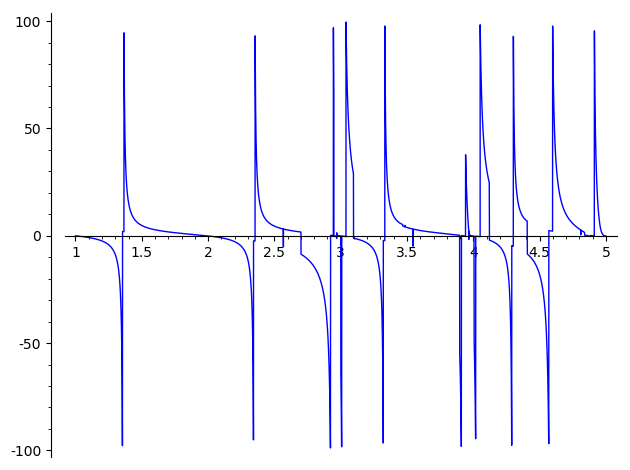

In [2]:
plot(lambda E: p.calculateError(2*E)[0], (1,5))

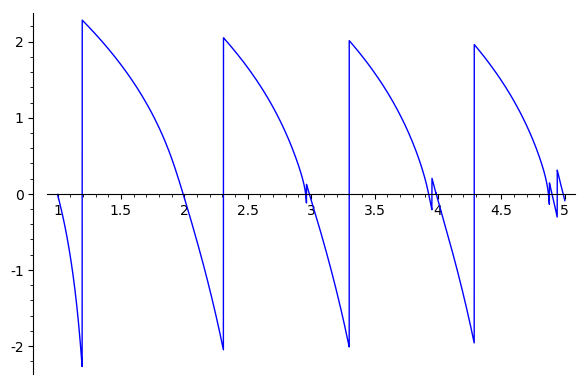

In [3]:
plot(lambda E: p.calculateError(2*E, PySE2d.ABS_SORTER)[0], (1,5))

In [28]:
def linspace(a, b, n):
    return a + (b-a)*np.arange(0, n+1, dtype="float")/n

def expand(f):
    return lambda d: f(*d)

In [63]:
n = 1000
Es = linspace(5,8, n)
err, derr = zip(*map(expand(zip), [plotjoined=True, 
        p.calculateErrors(2*E, p.ABS_SORTER) for E in Es]))

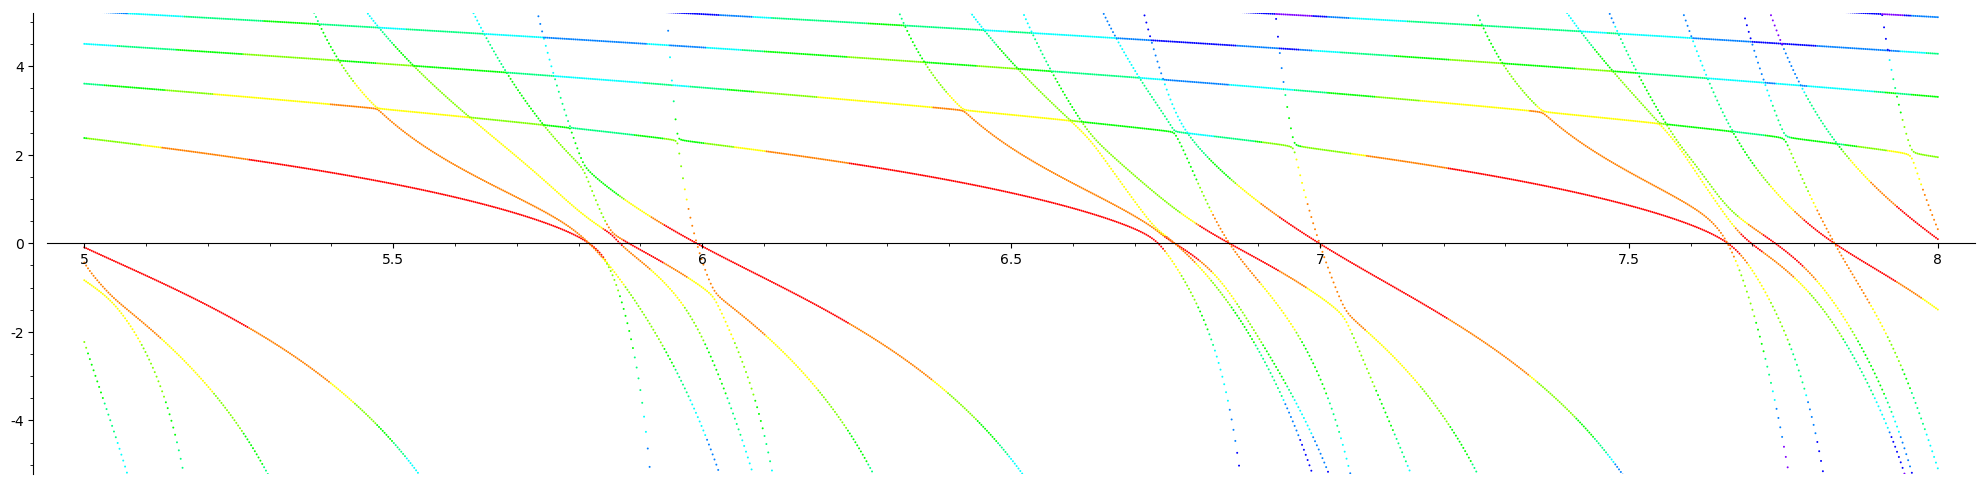

In [67]:
sum(list_plot(zip(Es, errs), size=2, color=hue(i/12)) for i, errs in enumerate(zip(*err))).show(ymin=-5, ymax=5, figsize=[20,5])